# prinPy Quick-start Guide

### Load in "local" module 
Currently, prinPy only has local algorithms. Eventually, there will be a global module as well. 

In [1]:
import sys
sys.path.append('C:/Users/artus/Git/prinPy')
from prinpy.local import *

# Some other modules
import numpy as np
import matplotlib.pyplot as plt
import timeit

***
## Example 1: A Simple Spiral

### Generate Test Data

In [2]:
theta = np.linspace(0,np.pi*3, 1000)
r = np.linspace(0,1,1000) ** .5

x_data = r * np.cos(theta) + np.random.normal(scale = .02, size = 1000)
y_data = r * np.sin(theta) + np.random.normal(scale = .02, size = 1000)

### Plot

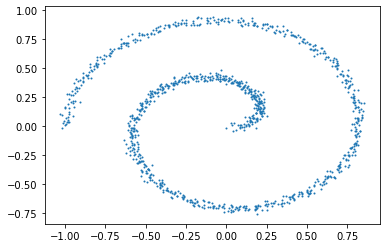

In [3]:
plt.scatter(x_data, y_data, s = 1)
plt.show()

### Fit Principal Curve with Local Algorithms

In [20]:
cl = CLPCG()  # Create CLPCG object

# the calc_pc method calculates the principal curve
# e_max is determined through trial and error as of
# now, but aim for about 1/2 data error and adjust from
# there. 
start = timeit.default_timer()

cl.fit(x_data, y_data, e_max = .02)  # CLPCG.fit() to fit PC

stop = timeit.default_timer()

print("Took %f seconds" % (stop - start))

Took 0.325096 seconds


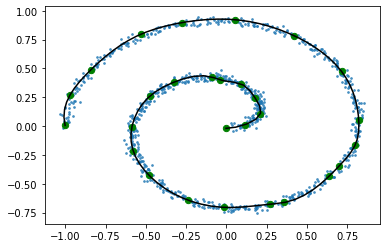

In [50]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, s = 3, alpha = .7)
cl.plot(ax)     # .plot will display the fit curve.
                # you can optionally pass in a matplotlib ax
pts = cl.fit_points   # fitted points with PC that spline is passed through
ax.scatter(pts[:,0], pts[:,1], s = 40, c = 'green')

In [24]:
# .proj will return a projection index for each point
proj = cl.project(x_data, y_data) 

In [31]:
print(proj[:5])

[array(-0.00205686), array(0.00018427), array(-0.02582185), array(0.00908784), array(0.0037364)]


In [43]:
# additionally, you can get spline ticks or fit points:
tck = cl.spline_ticks

In [45]:
print(tck[0])

[0.         0.         0.         0.         0.03896447 0.06135274
 0.08352509 0.10426669 0.11300648 0.14986747 0.17874178 0.2236278
 0.25515318 0.29038933 0.34005169 0.37552838 0.41994099 0.43326635
 0.48840507 0.50421934 0.53620988 0.56940218 0.63620039 0.70152601
 0.76134405 0.81227423 0.85394238 0.92125663 1.         1.
 1.         1.        ]


### Compare Speeds:

In [60]:
greedy = CLPCG()
search = CLPCS()

start1 = timeit.default_timer()
greedy.fit(x_data, y_data, e_max = .02)
stop1 = timeit.default_timer()

start2 = timeit.default_timer()
search.fit(x_data, y_data, e_max = .02)
stop2 = timeit.default_timer()

print("Greedy alg took %f seconds" % (stop1 - start1))
print("Search alg took %f seconds" % (stop2 - start2))

Greedy alg took 0.309251 seconds
Search alg took 6.569453 seconds


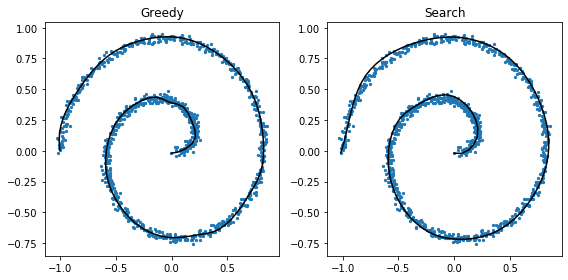

In [61]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
greedy.plot(ax[0])
search.plot(ax[1])
for ax_ in ax:
    ax_.scatter(x_data, y_data, s = 5)
    
ax[0].set_title('Greedy'); ax[1].set_title("Search")
plt.tight_layout()

***
## Example 2: Sine Wave

In [68]:
x_sine = np.linspace(0,4*np.pi,1000) + np.random.normal(scale = .1, size = 1000)
y_sine = np.sin(x_sine) + np.random.normal(scale = .1, size = 1000)

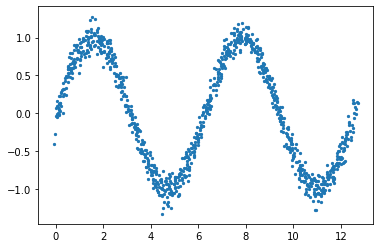

In [69]:
plt.scatter(x_sine, y_sine, s = 5)

In [70]:
start1 = timeit.default_timer()
greedy.fit(x_sine, y_sine, e_max = .02)
stop1 = timeit.default_timer()

start2 = timeit.default_timer()
search.fit(x_sine, y_sine, e_max = .02)
stop2 = timeit.default_timer()

print("Greedy alg took %f seconds" % (stop1 - start1))
print("Search alg took %f seconds" % (stop2 - start2))

TypeError: 'numpy.ndarray' object is not callable